In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

c = pd.read_excel("rollingsales_bronx.xls")
c

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 4G",,...,0,0,0,0,0,1958,2,D4,150000,2013-02-06
5264,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 5D",,...,0,0,0,0,0,1958,2,D4,108500,2013-04-10
5265,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 2J",,...,0,0,0,0,0,1957,2,D4,126000,2012-09-28
5266,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 1G",,...,0,0,0,0,0,1957,2,D4,125000,2013-05-23


In [22]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         5268 non-null   int64         
 1   NEIGHBORHOOD                    5268 non-null   object        
 2   BUILDING CLASS CATEGORY         5268 non-null   object        
 3   TAX CLASS AT PRESENT            5268 non-null   object        
 4   BLOCK                           5268 non-null   int64         
 5   LOT                             5268 non-null   int64         
 6   EASE-MENT                       5268 non-null   object        
 7   BUILDING CLASS AT PRESENT       5268 non-null   object        
 8   ADDRESS                         5268 non-null   object        
 9   APARTMENT NUMBER                5268 non-null   object        
 10  ZIP CODE                        5268 non-null   int64         
 11  RESI

In [3]:
c.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [10]:
#drop some columns
c.drop(['EASE-MENT','APARTMENT NUMBER','ZIP CODE', 'LOT', 'BLOCK'],axis=1, inplace=True)

In [11]:
#make value 0 as NaN
c['YEAR BUILT'][c['YEAR BUILT'] == 0] = np.NaN
c['SALE PRICE'][c['SALE PRICE'] == 0] = np.NaN
c['GROSS SQUARE FEET'][c['GROSS SQUARE FEET'] == 0] = np.NaN


/var/folders/h5/0sm7xyj948950qwc8qlp4sbc0000gn/T/ipykernel_25728/3011498058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR BUILT'][df['YEAR BUILT'] == 0] = np.NaN
/var/folders/h5/0sm7xyj948950qwc8qlp4sbc0000gn/T/ipykernel_25728/3011498058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE PRICE'][df['SALE PRICE'] == 0] = np.NaN
/var/folders/h5/0sm7xyj948950qwc8qlp4sbc0000gn/T/ipykernel_25728/3011498058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

<AxesSubplot: >

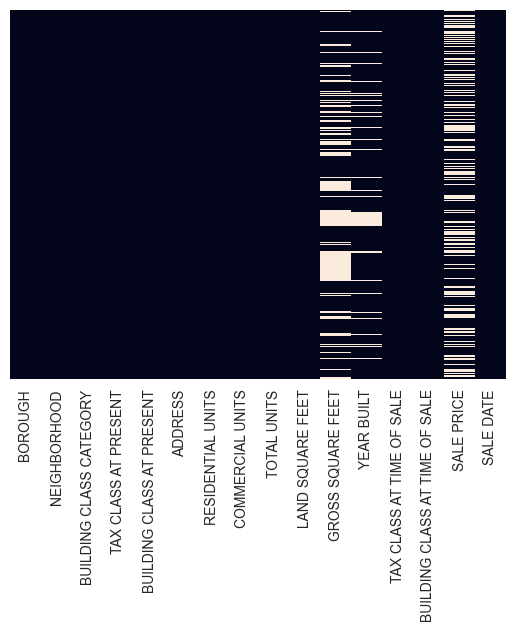

In [12]:
#the lines are outliers
sns.heatmap(c.isnull(), cbar=False, yticklabels=False)

In [13]:
#Remove missing values
c.dropna(axis=0,inplace=True)

In [14]:
c

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,A5,412 EAST 179TH STREET,1,0,1,1842,2048.0,1901.0,1,A5,355000.0,2013-07-08
1,2,BATHGATE,01 ONE FAMILY HOMES,1,A1,2329 WASHINGTON AVENUE,1,0,1,1103,1290.0,1910.0,1,A1,474819.0,2013-05-20
2,2,BATHGATE,01 ONE FAMILY HOMES,1,A1,2075 BATHGATE AVENUE,1,0,1,1986,1344.0,1899.0,1,A1,210000.0,2013-03-12
3,2,BATHGATE,01 ONE FAMILY HOMES,1,A1,2047 BATHGATE AVENUE,1,0,1,2329,1431.0,1901.0,1,A1,343116.0,2013-07-01
5,2,BATHGATE,02 TWO FAMILY HOMES,1,B1,505 EAST 171ST STREET,2,0,2,2000,2400.0,1993.0,1,B1,316500.0,2012-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,2,WOODLAWN,03 THREE FAMILY HOMES,1,C0,335 EAST 236 STREET,3,0,3,7754,3539.0,1910.0,1,C0,630000.0,2013-03-13
5245,2,WOODLAWN,07 RENTALS - WALKUP APARTMENTS,2A,C2,265 EAST 235 STREET,5,0,5,6100,2640.0,1925.0,2,C2,709600.0,2013-05-21
5246,2,WOODLAWN,07 RENTALS - WALKUP APARTMENTS,2,C1,251 EAST 236 STREET,22,0,22,5000,17400.0,1912.0,2,C1,2250000.0,2013-08-01
5247,2,WOODLAWN,07 RENTALS - WALKUP APARTMENTS,2A,C2,257 EAST 238 STREET,6,0,6,3000,3350.0,1927.0,2,C2,700000.0,2012-08-29


[Text(0.5, 1.0, 'Sales per Neighborhood')]

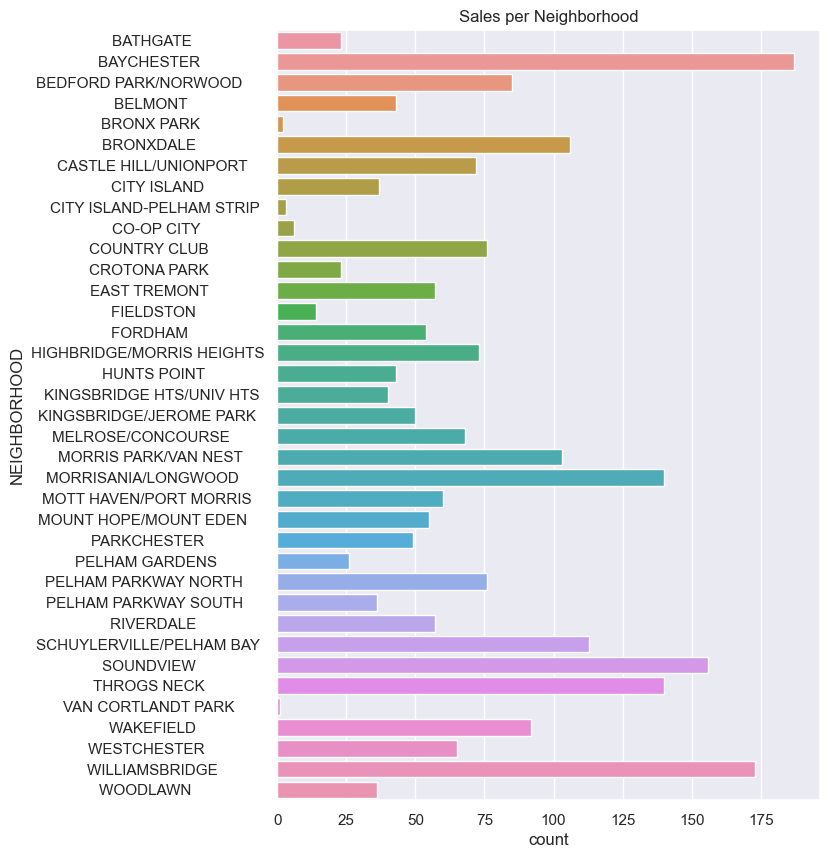

In [15]:
sns.set(rc={"figure.figsize": (7, 10)})
sns.countplot(data=c, y="NEIGHBORHOOD").set(
    title="Sales per Neighborhood")


/var/folders/h5/0sm7xyj948950qwc8qlp4sbc0000gn/T/ipykernel_25728/361750475.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='NEIGHBORHOOD', x='COMMERCIAL UNITS',data=df, ci=None).set(title="Sales of Commercial Units per Neighborhood")


[Text(0.5, 1.0, 'Sales of Commercial Units per Neighborhood')]

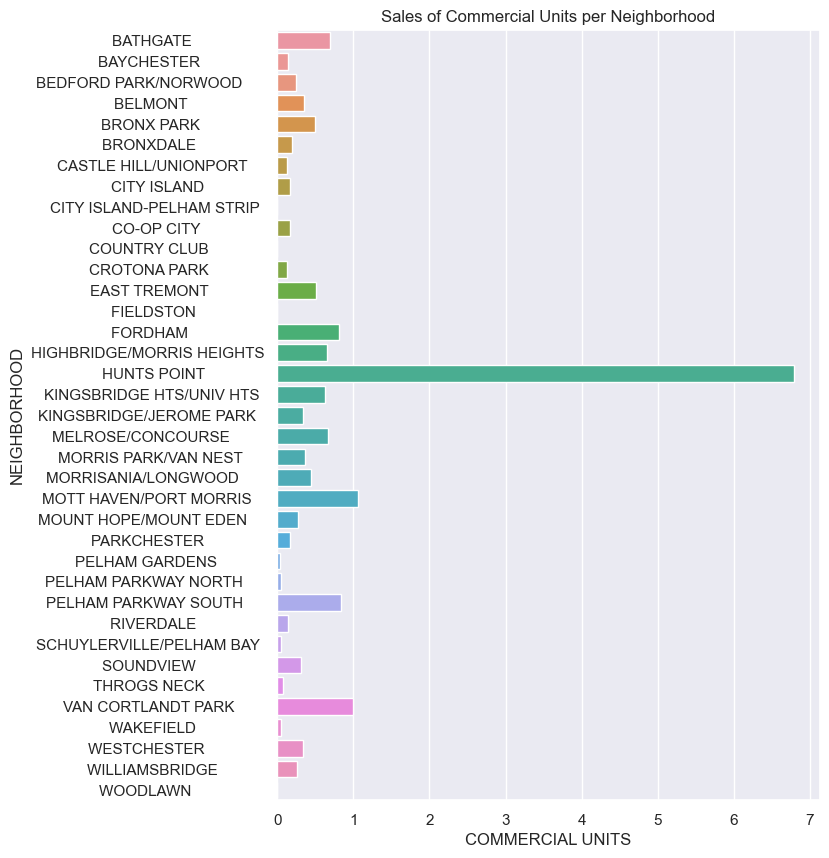

In [16]:
sns.barplot(y='NEIGHBORHOOD', x='COMMERCIAL UNITS',data=c, ci=None).set(title="Sales of Commercial Units per Neighborhood")

/var/folders/h5/0sm7xyj948950qwc8qlp4sbc0000gn/T/ipykernel_25728/3242255452.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='NEIGHBORHOOD', x='RESIDENTIAL UNITS',data=df, ci=None).set(title="Sales of Residential Units per Neighborhood")


[Text(0.5, 1.0, 'Sales of Residential Units per Neighborhood')]

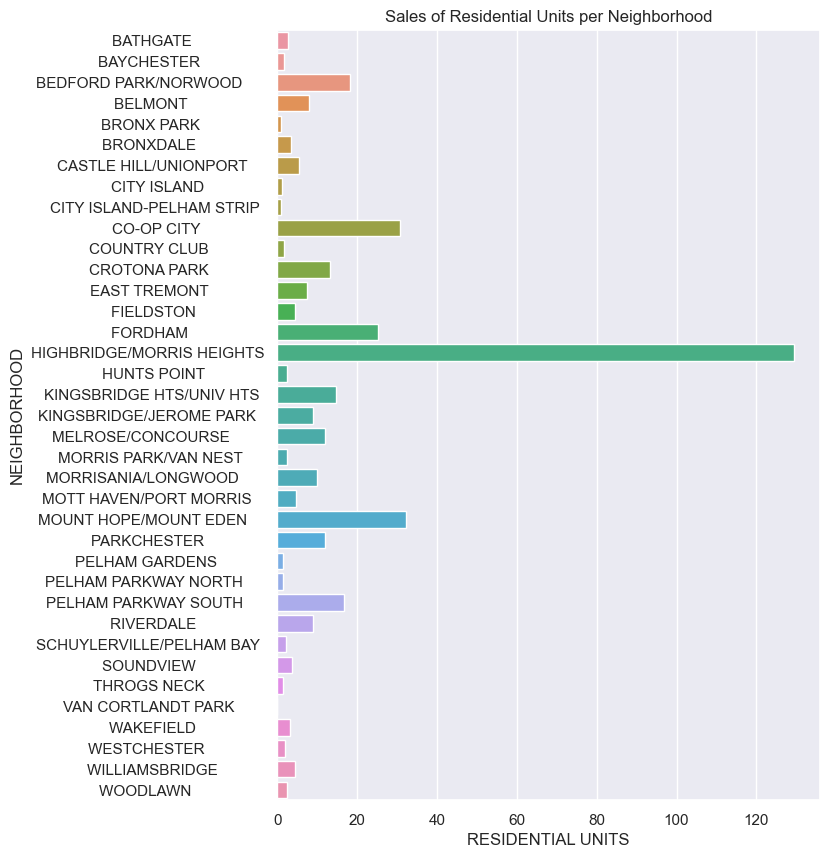

In [17]:
sns.barplot(y='NEIGHBORHOOD', x='RESIDENTIAL UNITS',data=c, ci=None).set(title="Sales of Residential Units per Neighborhood")

/var/folders/h5/0sm7xyj948950qwc8qlp4sbc0000gn/T/ipykernel_25728/174328554.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupYear = c.groupby(c["SALE DATE"].dt.year).sum()


<AxesSubplot: title={'center': 'Sale Price in 2012 and 2013'}, xlabel='SALE YEAR', ylabel='SALE PRICE'>

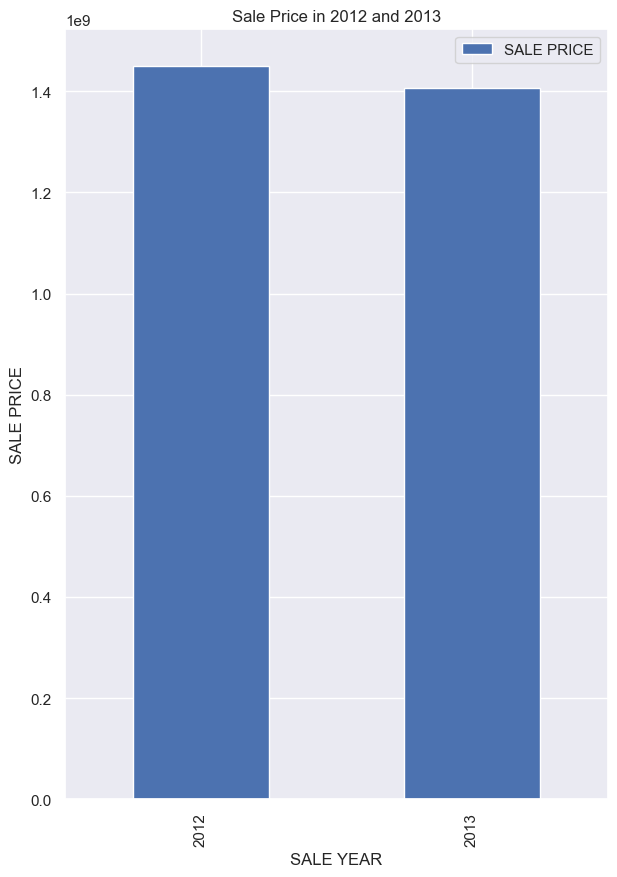

In [23]:
groupYear = c.groupby(c["SALE DATE"].dt.year).sum()
groupYear.plot(kind="bar", y="SALE PRICE", ylabel="SALE PRICE", xlabel="SALE YEAR", title="Sale Price in 2012 and 2013")

/var/folders/h5/0sm7xyj948950qwc8qlp4sbc0000gn/T/ipykernel_25728/2310967420.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupSquare["GROSS SQUARE FEET",
/var/folders/h5/0sm7xyj948950qwc8qlp4sbc0000gn/T/ipykernel_25728/2310967420.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupSquare["GROSS SQUARE FEET",


<AxesSubplot: title={'center': 'Average of Gross Square Feet by Tax Class'}, xlabel='TAX CLASS AT TIME OF SALE', ylabel='AVERAGE GROSS SQUARE FEET'>

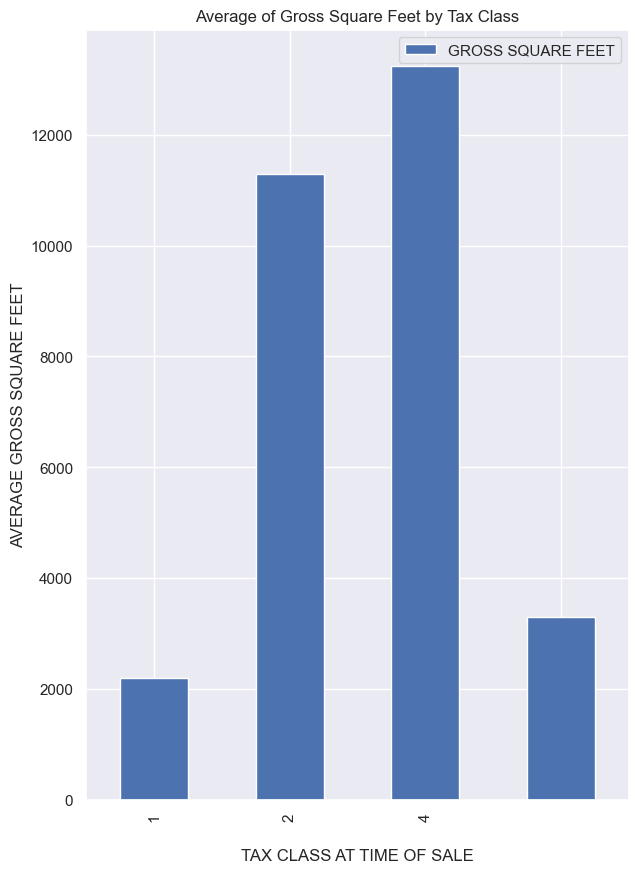

In [24]:
groupSquare = c.groupby(c["TAX CLASS AT TIME OF SALE"])
groupSquare["GROSS SQUARE FEET",
            "TAX CLASS AT TIME OF SALE"].mean().plot(kind='bar', ylabel="AVERAGE GROSS SQUARE FEET", title="Average of Gross Square Feet by Tax Class")



<AxesSubplot: title={'center': 'Properties sold over $1M and the Year they were built'}, xlabel='YEAR BUILT', ylabel='SALE PRICE'>

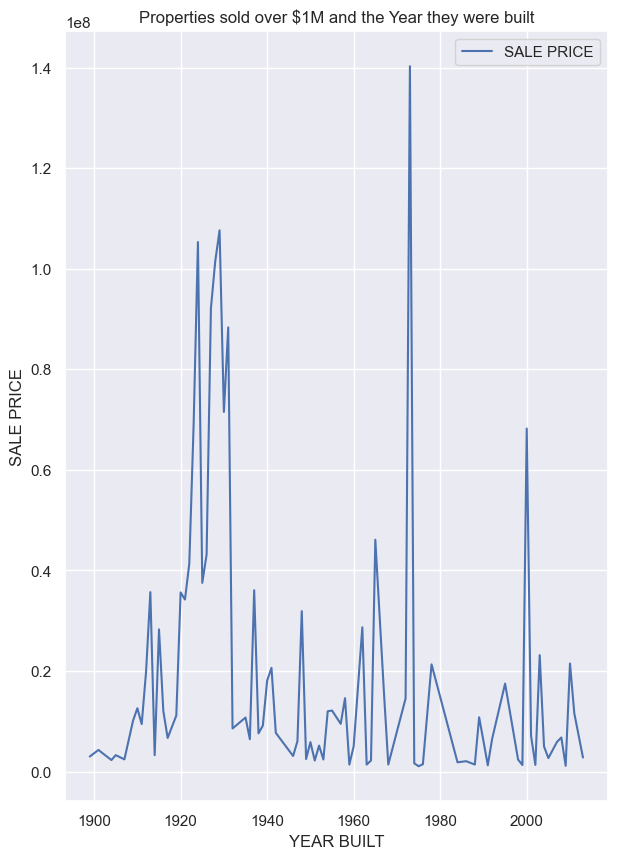

In [20]:
dfSelected = c[["SALE PRICE", "YEAR BUILT"]][c["SALE PRICE"] > 1000000]
dfSelected.groupby("YEAR BUILT").sum().plot(
    y="SALE PRICE", ylabel="SALE PRICE", title="Properties sold over $1M and the Year they were built")
